In [71]:
# import dataset
import pandas as pd
import numpy as np
data = pd.read_csv("C:/Users/Yuvraj Basera/OneDrive/Documents/Fraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [72]:
# check null values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [73]:
# check data types of all columns
print(data.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [74]:
# Exploring transaction type
data.type.value_counts()

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64

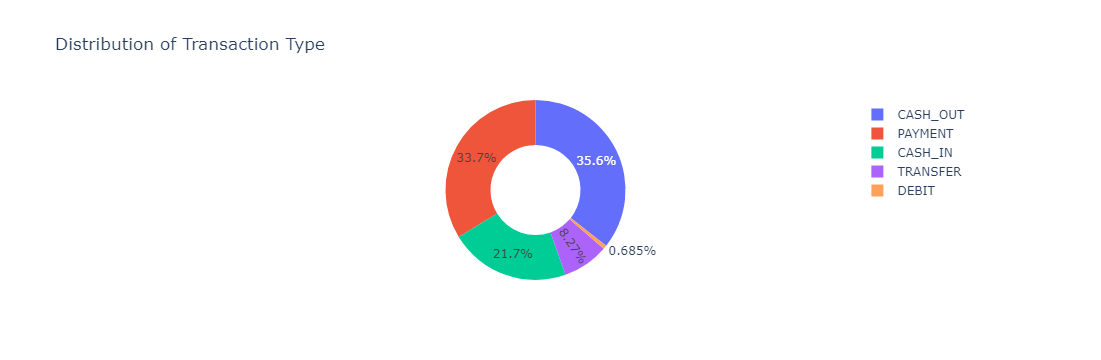

In [75]:
# make a pie chart for understand a basic knowledge how much distribution of transaction type.
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(data,
               values = quantity,
               names = transactions, hole = 0.5,
               title = "Distribution of Transaction Type" )
figure.show()

In [76]:
# replace categorical data some numeric values:
data["type"] = data["type"].map({"CASH_OUT" : 1, "PAYMENT" : 2,
                                "CASH_IN" : 3, "TRANSFER" : 4,
                                "DEBIT" : 5})
data["isFraud"] = data["isFraud"].map({0 : "NO FRAUD", 1 : "FRAUD"})
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,NO FRAUD,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,NO FRAUD,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,FRAUD,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,FRAUD,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,NO FRAUD,0


In [77]:
# splitting the data:
from sklearn.model_selection import train_test_split
x = np.array(data[["type","amount","oldbalanceOrg","newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [78]:
# training a machine learning model
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9994230264883294

In [79]:
# prediction
# features = [type, amount, oldbalaceOrg, newbalanceOrig]
features = np.array([[4,9000.60,9000.60,0.0]])
print(model.predict(features))

['FRAUD']
